In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
# architecture variables
PATH = "data/dog_breeds/"

arch=inceptionresnet_2
sz=299
bs=100

In [4]:
!rm -r {PATH}tmp/

In [4]:
# get cross validation indexes of labels
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [5]:
# model variables
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz=sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', label_csv, bs=bs, tfms=tfms, val_idxs=val_idxs,
                                       suffix='.jpg', test_name='test')
    return data

In [6]:
# dataset
data = get_data(sz, bs)

In [7]:
# Train last layer
learn = ConvLearner.pretrained(arch, data, ps=0.5)

# ps -> dropout parameters
# hyperparameter to control overfitting (train loss < val loss) by dropping random % of nodes in a layer

In [9]:
# def plot_loss_change(sched, sma=1, n_skip=20, y_lim=(-0.01,0.01)):
#     """
#     Plots rate of change of the loss function.
#     Parameters:
#         sched - learning rate scheduler, an instance of LR_Finder class.
#         sma - number of batches for simple moving average to smooth out the curve.
#         n_skip - number of batches to skip on the left.
#         y_lim - limits for the y axis.
#     """
#     derivatives = [0] * (sma + 1)
#     for i in range(1 + sma, len(learn.sched.lrs)):
#         derivative = (learn.sched.losses[i] - learn.sched.losses[i - sma]) / sma
#         derivatives.append(derivative)
        
#     plt.ylabel("d/loss")
#     plt.xlabel("learning rate (log scale)")
#     plt.plot(learn.sched.lrs[n_skip:], derivatives[n_skip:])
#     plt.xscale('log')
#     plt.ylim(y_lim)

In [10]:
# learn.lr_find()
# learn.sched.plot()
# plot_loss_change(learn.sched, sma=20, y_lim=(-0.1, 0.01))

In [11]:
lr = 1e-1

In [12]:
learn.fit(lr, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

[0.      0.67552 0.24318 0.92546]                          
[1.      0.40609 0.22838 0.93212]                          
[2.      0.37047 0.24332 0.92628]                          



In [13]:
# learn.save('299_last')
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)
learn.save('299_last')

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.30707 0.24726 0.92805]                          
[1.      0.3322  0.24941 0.92701]                          
[2.      0.27436 0.22242 0.93022]                          
[3.      0.29665 0.25363 0.92641]                          
[4.      0.28339 0.23535 0.93485]                          
[5.      0.24886 0.23069 0.93628]                          
[6.      0.2188  0.22903 0.93818]                          



In [14]:
# learn.load('299_last')

In [15]:
# learn.fit(lr, 3, cycle_len=3)

In [16]:
# learn.save('299_last')

In [17]:
learn.set_data(get_data(399, 64))

In [18]:
lr = 1e-3
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[0.      0.24046 0.21317 0.93496]                            
[1.      0.22556 0.21268 0.9335 ]                            
[2.      0.22109 0.2097  0.93594]                            
[3.      0.2261  0.20766 0.93545]                            
[4.      0.21662 0.2068  0.93597]                            
[5.      0.21215 0.20702 0.93496]                            
[6.      0.21274 0.20479 0.93643]                            



In [19]:
learn.save('399_last')

In [8]:
learn.load('299_last')

In [9]:
res = learn.predict(is_test=True)

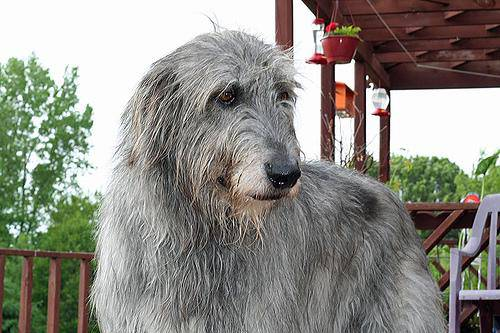

In [9]:
img = learn.data.test_ds.fnames[0]
Image.open(PATH+img)

In [11]:
def tfms_from_test(sz, max_zoom=None, pad=0, crop_type=None, tfm_y=None):
    stats = ([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])   # inception stats (NOT IMAGENET)
    tfm_norm = Normalize(*stats)
    tfm_denorm = Denormalize(*stats)
    test_tfms = image_gen(tfm_norm, tfm_denorm, sz, pad=pad, crop_type=CropType.CENTER, tfm_y=tfm_y)
    return test_tfms

In [12]:
test_tfms = tfms_from_test(299)

In [18]:
trn_tfms, val_tfms = tfms_from_model(arch, 299)

In [21]:
img

'test/de084b830010b6107215fef5d4a75b94.jpg'

In [19]:
im = val_tfms(Image.open(PATH+img))
preds = learn.predict_array(im[None])
prob = np.argmax(preds)

AttributeError: 'JpegImageFile' object has no attribute 'shape'

In [17]:
# im = test_tfms(Image.open(PATH+img))
# preds = learn.predict_array(im[None])
# prob = np.argmax(preds)

TypeError: 'Transforms' object does not support indexing

In [36]:
# Test Time Augmentation

log_preds,y = learn.TTA(is_test=True)
probs = np.mean(np.exp(log_preds),0)

In [34]:
probs

array([[0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.00242, 0.     ],
       ...,
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
       [0.00001, 0.     , 0.     , ..., 0.     , 0.     , 0.00003]], dtype=float32)

In [37]:
df = pd.DataFrame(probs)
df.columns = learn.data.classes
df.insert(0, 'id', [o[5:-4] for o in learn.data.test_ds.fnames])

In [38]:
SUBM = f'{PATH}subm/'
filename = 'inception_resnet_v2_3'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(SUBM+filename, index=False)

In [39]:
# submit to kaggle via cli
! kg submit {SUBM+filename} -c dog-breed-identification


0.21010
